# **Exploring the effect of various external factors on Weekly Sales of Walmart Stores**

---

Group Members: Mu Ye Liu and 3 others.

---

In [20]:
## Load the necessary R packages
library(gridExtra)
library(dplyr)
library(ggplot2)

---

## **Introduction**

#### **About the Dataset**

The data we are analyzing is obtained from Kaggle, with link: https://www.kaggle.com/datasets/mikhail1681/walmart-sales?resource=download.

This dataset contains information on 45 Walmart stores across multiple regions, with data mostly collected between the through time between the years of 2010 - 2012. Each entry represented a week, where the weekly sales of the store in USD (our response variable) and other external factors such as average temperature, fuel price, whether or not a holiday existed throughout the week, etc are also recorded. This dataset was scraped from the official website of Amazon through BeautifulSoup and WebDriver using Python. 

#### **Motivation for analysis**

Analyzing this dataset can reveal insights into the factors influencing retail sales at Walmart, such as holidays, weather, and broader economic conditions. Understanding these relationships is valuable for developing data-driven strategies to optimize inventory, staffing, and marketing efforts. Insights from this dataset may also provide predictive value to other retail businesses seeking to enhance their sales forecasting and adapt to economic fluctuations. 

#### **Load the Dataset**

In [9]:
# Load the data
data = read.csv("Walmart_Sales.csv") |> na.omit()

# Modify the contents of the data below
#############

# Change the temperature to celcius
data$Temperature = round((data$Temperature - 32)*(5/9), 2)

# Round the decimal places for the following columns
data$Fuel_Price = round(data$Fuel_Price, 2)
data$CPI = round(data$CPI, 2)
data$Weekly_Sales = round(data$Weekly_Sales, 0)

# Convert Holiday flag to factor (because it's categorical)
data$Holiday_Flag = factor(data$Holiday_Flag)

# Print out a summary of the first and last lines.
head(data)
tail(data)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
,<int>,<chr>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,05-02-2010,1643691,0,5.73,2.57,211.10,8.106
2,1,12-02-2010,1641957,1,3.62,2.55,211.24,8.106
3,1,19-02-2010,1611968,0,4.41,2.51,211.29,8.106
4,1,26-02-2010,1409728,0,8.13,2.56,211.32,8.106
5,1,05-03-2010,1554807,0,8.06,2.62,211.35,8.106
6,1,12-03-2010,1439542,0,14.33,2.67,211.38,8.106


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
,<int>,<chr>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>
6430,45,21-09-2012,723086,0,18.51,4.04,191.86,8.684
6431,45,28-09-2012,713174,0,18.27,4.00,192.01,8.684
6432,45,05-10-2012,733455,0,18.27,3.98,192.17,8.667
6433,45,12-10-2012,734464,0,12.48,4.00,192.33,8.667
6434,45,19-10-2012,718126,0,13.59,3.97,192.33,8.667
6435,45,26-10-2012,760281,0,14.92,3.88,192.31,8.667


---

## **Description of Variables**

**Weekly_Sales** (*Continuous, Response variable*) - Weekly revenue generated from sales through the week in USD

**Holiday_Flag** (*Dummy Categorical, Covariate*) - Indicator for: holiday exists within the week (1) or no holidays exist within the week (0).

**Temperature** (*Continuous, Covariate*) - Average air temperature in the store’s region throughout the week which is originally in degrees fahrenheit. For our analysis, we converted it into degrees celcius

**Fuel_Price** (*Continuous, Covariate*) - Average cost of fuel in the store’s region USD per gallon throughout the week.

**CPI** (*Continuous, Covariate*) - Average Consumer Price Index throughout the week.

**Unemployment** (*Continous, Covariate*) - Average Unemployment rate (%) throughout the week.

---

## **Data Pre-Processing**

Since the original dataset comprises 6,435 observations from 45 stores, conducting regression analysis on the entire dataset would violate the assumption of independence (i.e., observations are independent of one another). This is due to the fact that weekly sales within the same store are highly dependent, as they are influenced by shared factors such as location, recurring customer behavior patterns, local economic conditions, and store-specific operational strategies.

Therefore, we decide to choose one store as a representative of all the stores, which can reflect the characteristics of all stores.

To select a store that represents the overall characteristics of all stores effectively, we identify the store with the median rank based on a combination of its average weekly sales and variance in weekly sales. The calculations were performed using a series of steps. First, summary statistics, including the mean and variance of weekly sales, were computed for each store. The sum of these two ranks was calculated to determine each store’s combined rank. Subsequently, the data was sorted based on the combined rank, and the store corresponding to the median rank was identified as the most representative.

[1] 40


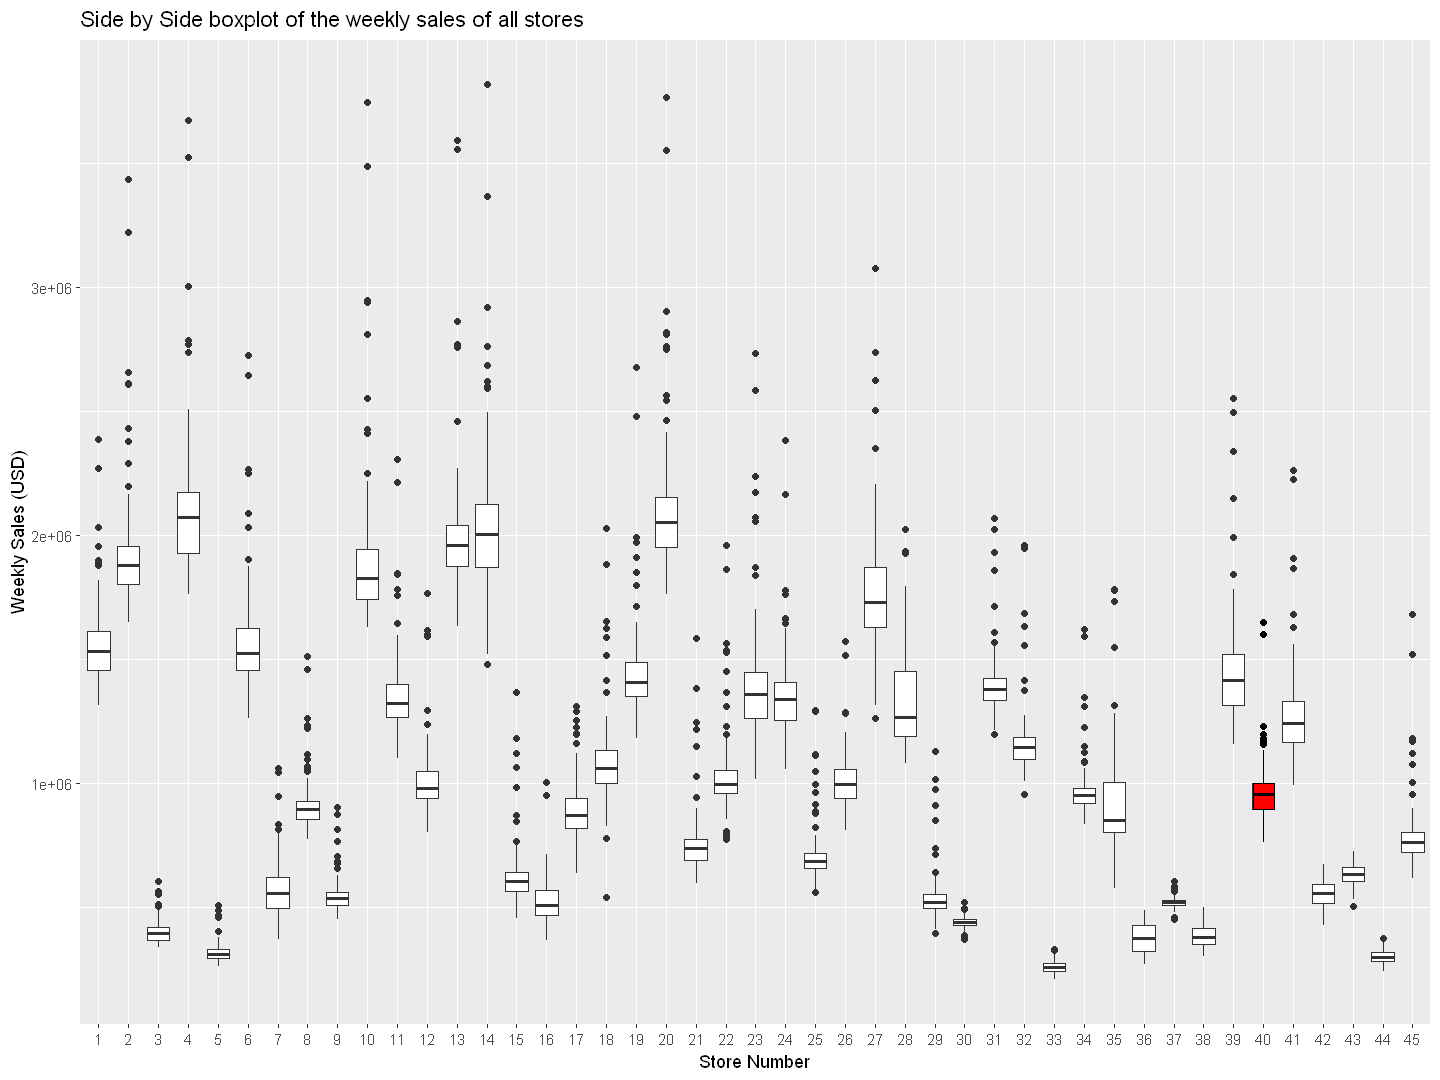

In [ ]:
# First, obtain the summary statistics for each store
data_summary = data |> group_by(Store) |> summarize(mean_weekly_sales = mean(Weekly_Sales), var_weekly_sales = var(Weekly_Sales)) |> mutate(rank_mean_weekly_sales = rank(mean_weekly_sales), rank_var_weekly_sales = rank(var_weekly_sales)) |> mutate(sum_of_ranks = rank_mean_weekly_sales + rank_var_weekly_sales)

# Then raange the rows based on the overall rank
data_summary = data_summary |> arrange(sum_of_ranks) 

# Extract the store number we choose (the store with median combined rank)
chosen_store = data_summary[round(nrow(data_summary)/2, 0), 1] |> pull()
print(chosen_store)

# Set ggplot size
options(repr.plot.width = 12, repr.plot.height = 9)

# Create a boxplot that plots the individual stores (with their store number recorded) against their weekly sales 
ggplot(data = data, aes(x = factor(Store), y = Weekly_Sales)) +
  geom_boxplot() +
  geom_boxplot(data = subset(data, factor(Store) == "40"), 
               aes(x = factor(Store), y = Weekly_Sales),
               fill = "red", color = "black", width = 0.7) +
  labs(title = "Side by Side boxplot of the weekly sales of all stores", x = "Store Number", y = "Weekly Sales (USD)")

The whole dataset was then filtered to only entries that were from store 40

In [15]:
# Get the data for the store we chose
store_40 = data |> filter(Store == chosen_store)
head(store_40)
tail(store_40)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
,<int>,<chr>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>
1,40,05-02-2010,1001944,0,-9.73,2.79,131.53,5.892
2,40,12-02-2010,955338,1,-6.20,2.77,131.59,5.892
3,40,19-02-2010,916289,0,-2.31,2.75,131.64,5.892
4,40,26-02-2010,863917,0,0.73,2.75,131.69,5.892
5,40,05-03-2010,990152,0,1.54,2.77,131.74,5.892
6,40,12-03-2010,899352,0,1.72,2.81,131.78,5.892


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
,<int>,<chr>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>
138,40,21-09-2012,899768,0,12.29,4.06,138.65,4.156
139,40,28-09-2012,919595,0,10.54,4.02,138.74,4.156
140,40,05-10-2012,1069112,0,14.01,4.03,138.83,4.145
141,40,12-10-2012,982523,0,8.53,4.03,138.91,4.145
142,40,19-10-2012,918170,0,7.96,4.00,138.83,4.145
143,40,26-10-2012,921265,0,9.81,3.92,138.73,4.145


In this analysis, store 40 was selected as the representative store. A boxplot of weekly sales across all stores confirmed that store 40's sales patterns are reasonable and reflective of the general trends observed in the dataset, since the mean and variance of store 40’s weekly sales seem to be fairly average across all stores. Our store selection process ranks the stores by weekly sales, as well as its variance of weekly sales, and takes the sum of the ranks. The store with the median sum of ranks (store 40)  is selected to increase the likelihood of the selected store being able to well represent the key statistical characteristics of the entire dataset.

Also, 2 outlier points (data points that have a weekly sales above $1,500,000) were removed to avoid a biased model and have a more accurate model selection (performed below). This is because the 2 outliers will increase the standard errors of our estimated coefficients, thus increasing the p-value, and the likelihood that the covariate is removed during the model selection process (Type 2 error where the null hypothesis of the covariate having slope = 0 is failed to be rejected).

--- 

## **Exploratory Data Analysis**

Based on the store we chosen (store 40), we then conduct data visualization of the response variable and covariates to do preliminary data analysis before using the regression model.

First, 4 scatter plots **Weekly Sales vs. the four continuous variables** (CPI, Unemployment, Fuel Price, and Temperature), **categorized by Holiday_Flag** were created to preliminarily observe how each covariate (along with holiday flag interactions) affects the weekly sales.

`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


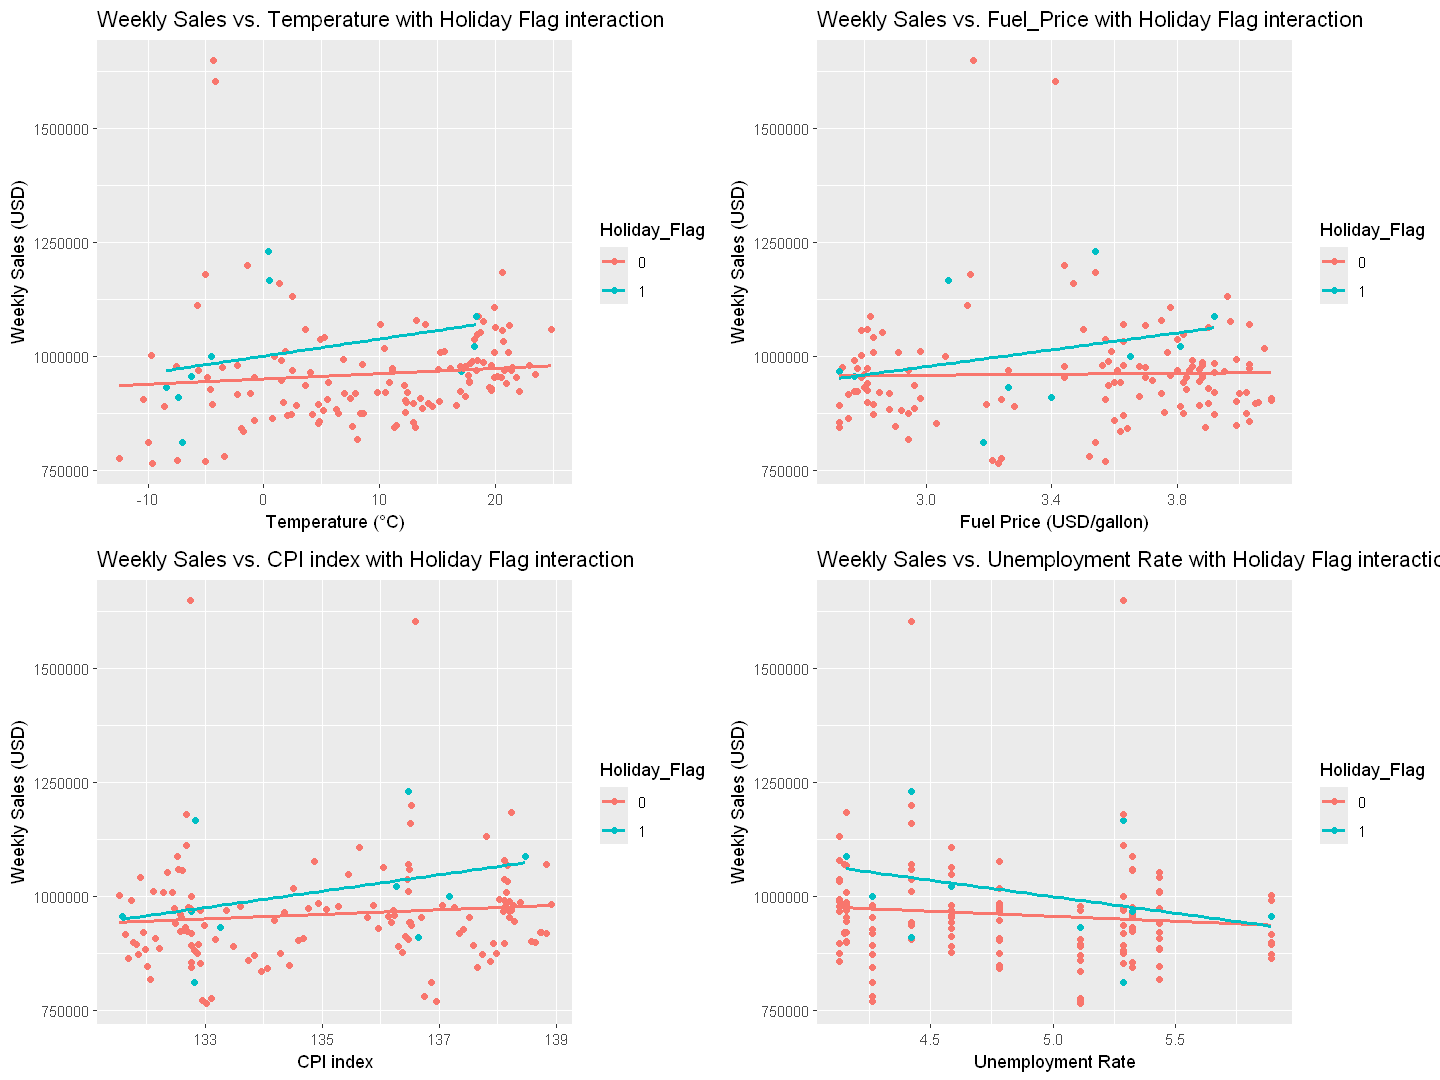

In [24]:
# Weekly Sales vs. Temperature including Holiday Flag interaction
temp_holiday_plot = ggplot(data = store_40, aes(x = Temperature, y = Weekly_Sales, col = Holiday_Flag)) +
  geom_point() + 
  labs(title = "Weekly Sales vs. Temperature with Holiday Flag interaction", x = "Temperature (°C)", y = "Weekly Sales (USD)") +
  geom_smooth(method = "lm", se = FALSE)


# Weekly Sales vs. Fuel Price including Holiday Flag interaction
fuel_holiday_plot = ggplot(data = store_40, aes(x = Fuel_Price, y = Weekly_Sales, col = Holiday_Flag)) +
  geom_point() + 
  labs(title = "Weekly Sales vs. Fuel_Price with Holiday Flag interaction", x = "Fuel Price (USD/gallon)", y = "Weekly Sales (USD)") +
  geom_smooth(method = "lm", se = FALSE)

# Weekly Sales vs. CPI
cpi_holiday_plot = ggplot(data = store_40, aes(x = CPI, y = Weekly_Sales, col = Holiday_Flag)) +
  geom_point() + 
  labs(title = "Weekly Sales vs. CPI index with Holiday Flag interaction", x = "CPI index", y = "Weekly Sales (USD)") +
  geom_smooth(method = "lm", se = FALSE)

# Weekly Sales vs. Unemployment
unemployment_holiday_plot = ggplot(data = store_40, aes(x = Unemployment, y = Weekly_Sales, col = Holiday_Flag)) +
  geom_point() + 
  labs(title = "Weekly Sales vs. Unemployment Rate with Holiday Flag interaction", x = "Unemployment Rate", y = "Weekly Sales (USD)") +
  geom_smooth(method = "lm", se = FALSE)

# Set ggplot size
options(repr.plot.width = 12, repr.plot.height = 9)

# Arrange the plots in a 2x2 grid
grid.arrange(temp_holiday_plot, fuel_holiday_plot, cpi_holiday_plot, unemployment_holiday_plot, nrow = 2, ncol = 2)